In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import matplotlib.gridspec as gridspec
from utils import progress_bar

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train_data= pd.read_csv("case2_training.csv")
test_data=pd.read_csv("case2_testing.csv")

In [12]:
train_data.head()
train_data.shape
train_data.tail()

ID  Region  Date  Weekday  Apartment  Beds    Review  Pic Quality  \
49995  49996       1    68        6          0     1  3.669174     0.858494   
49996  49997       9   217        1          1     2  4.849890     0.678795   
49997  49998      10   100        3          1     2  4.971527     0.993316   
49998  49999      10   170        3          1     2  4.951120     0.792698   
49999  50000       2   225        2          0     1  4.921654     0.250378   

            Price  Accept  
49995  199.187671       1  
49996  348.927419       0  
49997  317.187052       1  
49998  460.453975       0  
49999  247.206407       0

1. check for na values                    
2. check the distribution of the dataset
3. check for duplicate


In [144]:
train_data.isnull().any().any() # No NA data
train_data.drop_duplicates().shape #No duplicate
train_data.describe() # The dataset seems intact
                      # The distribution of target is not so imbalanced.
                      # The distribution of all covariates are fine
#train_data.summary()


test_data.isnull().any().any()
train_data.describe()

ID        Region          Date      Weekday     Apartment  \
count  50000.000000  50000.000000  50000.000000  50000.00000  50000.000000   
mean   25000.500000      5.495460    182.824300      3.99276      0.801840   
std    14433.901067      2.862611    105.653134      2.00837      0.398617   
min        1.000000      1.000000      1.000000      1.00000      0.000000   
25%    12500.750000      3.000000     91.000000      2.00000      1.000000   
50%    25000.500000      5.000000    183.000000      4.00000      1.000000   
75%    37500.250000      8.000000    274.000000      6.00000      1.000000   
max    50000.000000     10.000000    365.000000      7.00000      1.000000   

               Beds        Review   Pic Quality         Price       Accept  
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.00000  
mean       1.495760      4.509402      0.750261    316.963436      0.27032  
std        0.693189      0.460287      0.193746     92.644791      0.44413  
min        1.000000      3.000000      0.036809     80.000000      0.00000  
25%        1.000000      4.306552      0.630497    251.637842      0.00000  
50%        1.000000      4.652005      0.794165    315.334386      0.00000  
75%        2.000000      4.855238      0.908876    378.920370      1.00000  
max        4.000000      4.999996      0.999985    726.527643      1.00000

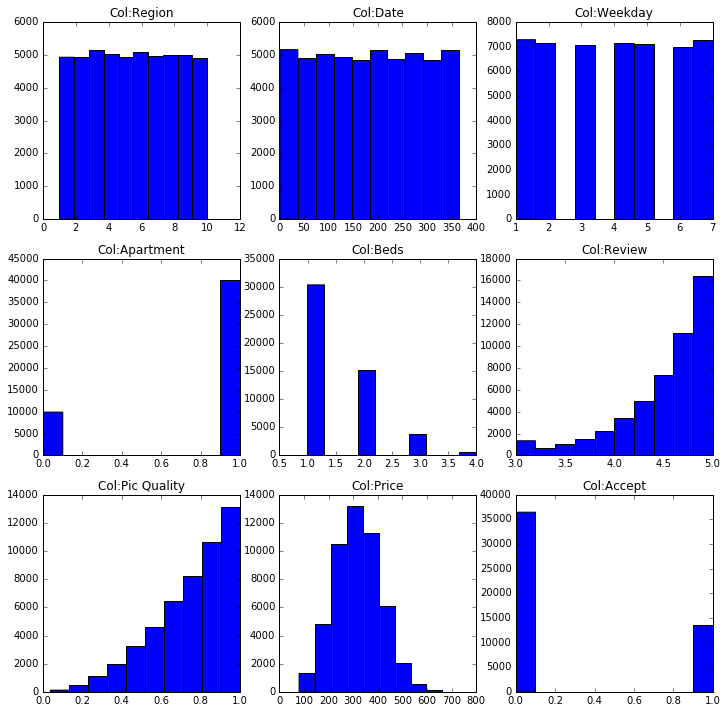

In [28]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(3,3)

for i,col in enumerate(train_data.columns):
    if(col != 'ID'):
        ax = plt.subplot(gs[i-1])
        ax.set_title('Col:%s' % col)
#        ax.set_aspect('equal')
        plt.hist(train_data[col])


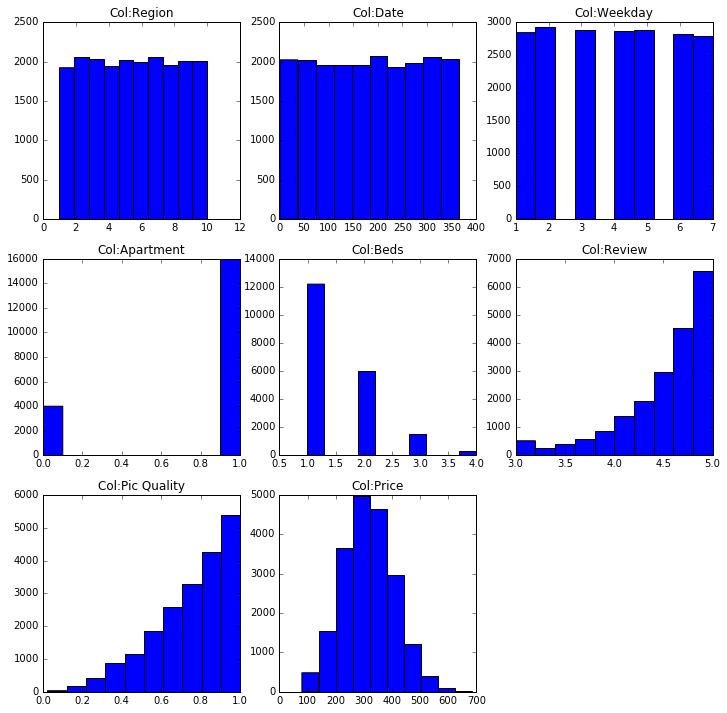

In [53]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(3,3)

for i,col in enumerate(test_data.columns):
    if(col != 'ID'):
        ax = plt.subplot(gs[i-1])
        ax.set_title('Col:%s' % col)
#        ax.set_aspect('equal')
        plt.hist(test_data[col])

# Data preprocessing

1. bin the date into 12 month, expecting some seasonal influence.

In [44]:
import calendar
#from sklearn.preprocessing import LabelEncoder

calendar.monthrange(2012,2)[1]

bin_date = np.zeros(13)
for m in range(1,13):
    bin_date[m] = calendar.monthrange(2011,m)[1]
    
train_data['bin_Date']=  pd.cut(train_data['Date'], np.cumsum(bin_date))

#train_data['bin_Date'] = 0
#train_data.loc[(train_data['Date'] >=1) & (train_data['Date']<=60),'bin_Date'] = 1
#train_data.loc[(train_data['Date'] >=61) & (train_data['Date']<=182),'bin_Date'] = 2
#train_data.loc[(train_data['Date'] >=183) & (train_data['Date']<=245),'bin_Date'] = 3
#train_data.loc[(train_data['Date'] >=246) & (train_data['Date']<=365),'bin_Date'] = 4


trainset = pd.get_dummies(train_data, columns= ['Region','bin_Date', 'Weekday', 'Beds'])
#transform to one-hot representation.

In [46]:
#calendar.monthrange(2012,2)
#np.cumsum(bin_date)
#train_data['bin_Date']
trainset.describe()
train_X = trainset.copy()
#for col in train_X.columns:
#    for name in ['Region']:
#        if name in col:
#            del train_X[col]
#            break
    
for name in ['ID', 'Date', 'Accept','Apartment']:
    del train_X[name]

train_y =trainset['Accept']

In [25]:
len(train_X.columns) #3+10+12+7+4
#train
#train_X

Review  Pic Quality       Price  Region_1  Region_2  Region_3  \
0      4.526975     0.739994  230.552998         0         0         0   
1      4.548455     0.862642  348.203425         0         1         0   
2      4.965732     0.515548  430.462327         0         0         0   
3      4.752735     0.561547  149.305433         0         0         1   
4      3.890960     0.817142  165.264184         1         0         0   
5      4.943372     0.990913  270.001967         0         1         0   
6      4.322199     0.593140  576.754677         0         0         0   
7      4.811223     0.786569  457.293737         0         0         0   
8      4.577265     0.799762  435.935012         0         0         0   
9      4.851933     0.943481  307.155959         0         0         0   
10     4.823589     0.842970  246.547078         0         1         0   
11     4.540454     0.464842  350.448108         0         0         0   
12     4.857455     0.645159  262.017575         0         0         0   
13     4.659031     0.997625  546.227906         0         0         0   
14     4.525652     0.849263  351.241792         0         0         0   
15     4.960793     0.621834  283.258119         0         0         0   
16     4.953158     0.906570  473.660999         0         0         0   
17     4.891202     0.957223  372.670043         0         0         0   
18     4.939119     0.875869  289.590247         1         0         0   
19     4.992113     0.680778  285.168316         0         1         0   
20     4.746781     0.784703  337.804113         0         0         1   
21     4.939788     0.917248  290.463417         0         0         0   
22     4.513816     0.967149  450.492689         0         0         0   
23     4.148750     0.518029  276.114190         0         0         0   
24     4.220023     0.904630  337.872313         0         0         0   
25     4.465407     0.623404  474.033576         0         0         0   
26     4.446310     0.799421  346.564192         0         0         0   
27     4.484807     0.537822  377.426122         0         0         0   
28     4.832295     0.938286  386.714930         0         0         0   
29     4.934404     0.727297  269.571381         0         0         0   
...         ...          ...         ...       ...       ...       ...   
49970  4.914504     0.921022  366.040966         0         0         1   
49971  4.900625     0.971084  385.656594         0         0         0   
49972  4.497192     0.998725  425.106431         0         0         0   
49973  4.948811     0.694687  429.856167         0         0         0   
49974  4.179706     0.709088  347.612712         0         0         1   
49975  4.970182     0.750143  365.348045         0         0         0   
49976  4.899208     0.655490  464.596807         0         0         1   
49977  4.512335     0.905876  375.914073         0         0         0   
49978  4.194235     0.966099  373.810282         0         1         0   
49979  4.889553     0.890331  334.047254         0         0         0   
49980  4.948717     0.828041  347.059659         1         0         0   
49981  4.153256     0.100929  133.858153         0         0         0   
49982  4.915673     0.561213  390.984518         0         0         0   
49983  4.926445     0.777524  369.196711         0         0         0   
49984  4.996976     0.917150  286.430219         0         0         0   
49985  4.232414     0.757986  337.336011         0         0         0   
49986  4.498190     0.797848  263.108795         0         0         0   
49987  4.465152     0.622824  266.049673         1         0         0   
49988  4.843245     0.896755  202.586096         0         0         0   
49989  4.965107     0.933414  315.596681         0         0         1   
49990  4.632056     0.899604  457.521903         0         0         0   
49991  4.872987     0.965863  296.434783         0         0         0   
49992  4.3780

# Modelling part

## XGBoost

In [19]:
import xgboost as xgb
from sklearn.model_selection import KFold
import datetime as dt


best_score= 0

for rep in range(1):
    ran_num =  1209
    split_seed= np.random.RandomState(ran_num)
    print('The seed we are using is: %d' % ran_num)
    nr_runs = 5
    kf = KFold(n_splits=nr_runs, random_state=split_seed, shuffle=True)
    xgb_re = []
    for r, (train_index, test_index) in enumerate(kf.split(train_X, train_y)):
        print('\nround {:04d} of {:04d}, seed={}'.format(r+1, nr_runs, split_seed))

        tmp = dt.datetime.now().strftime("%Y-%m-%d-%H-%M")

        x1, x2 = train_X.iloc[train_index].values, train_X.iloc[test_index].values
        y1, y2 = train_y.iloc[train_index].values, train_y.iloc[test_index].values
        #x1, x2, y1, y2 = train_test_split(train_X, train_y, test_size=test_ratio, random_state=split_seed + r)
        print('splitted: {0}, {1}'.format(x1.shape, x2.shape), flush=True)

        #XGB
        xgb_train = xgb.DMatrix(x1, y1)
        xgb_valid = xgb.DMatrix(x2, y2)
        #
        watchlist = [(xgb_train, 'train'), (xgb_valid, 'valid')]
        params = {'eta': 0.02, 'max_depth': 5, 'subsample': 0.9, 'colsample_bytree': 0.9, 'objective': 'binary:logistic', 'seed': 99, 'silent': True}
        params['eta'] = 0.02
        params['max_depth'] = 3
        params['subsample'] = 0.8
        params['eval_metric'] = 'auc'
        params['colsample_bytree'] = 0.8
        params['colsample_bylevel'] = 0.8
        params['max_delta_step'] = 3
        params['gamma'] = 3.0
        params['labmda'] = 1
        params['scale_pos_weight'] = 1.0
        params['seed'] = ran_num + r
        nr_round = 3000
        min_round = 100

        model1 = xgb.train(params, 
                           xgb_train, 
                           nr_round,  
                           watchlist, 
                           verbose_eval=50, 
                           early_stopping_rounds=min_round)

        best_score += model1.best_score
        #test_X_dup = test_X.copy()
        #pred_xgb = model1.predict(xgb.DMatrix(test_X_dup), ntree_limit=model1.best_ntree_limit+tree_lim)

        #
        #file = 'gbm/subm_{}_xgb_{:02d}.csv'.format(tmp, r+1)
        #subm = pd.DataFrame({'id': test['id'].values, target: pred_xgb})
        #subm.to_csv(file, index=False, float_format='%.6f')
        #subms.append(file)    
        
print('The best score we got is: {}.'.format(best_score/5), flush=True)      

The seed we are using is: 1209

round 0001 of 0005, seed=<mtrand.RandomState object at 0x1040ee360>
splitted: (40000, 28), (10000, 28)
[0]	train-auc:0.685594	valid-auc:0.683868
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 100 rounds.
[50]	train-auc:0.745439	valid-auc:0.739362
[100]	train-auc:0.757559	valid-auc:0.750996
[150]	train-auc:0.765405	valid-auc:0.758427
[200]	train-auc:0.772843	valid-auc:0.765193
[250]	train-auc:0.779126	valid-auc:0.771028
[300]	train-auc:0.783603	valid-auc:0.775304
[350]	train-auc:0.787022	valid-auc:0.778143
[400]	train-auc:0.789799	valid-auc:0.780246
[450]	train-auc:0.792171	valid-auc:0.782016
[500]	train-auc:0.794079	valid-auc:0.783418
[550]	train-auc:0.795598	valid-auc:0.784471
[600]	train-auc:0.796927	valid-auc:0.785425
[650]	train-auc:0.798027	valid-auc:0.786086
[700]	train-auc:0.799138	valid-auc:0.786811
[750]	train-auc:0.800177	valid-auc:0.787333
[800]	train-auc:0.80

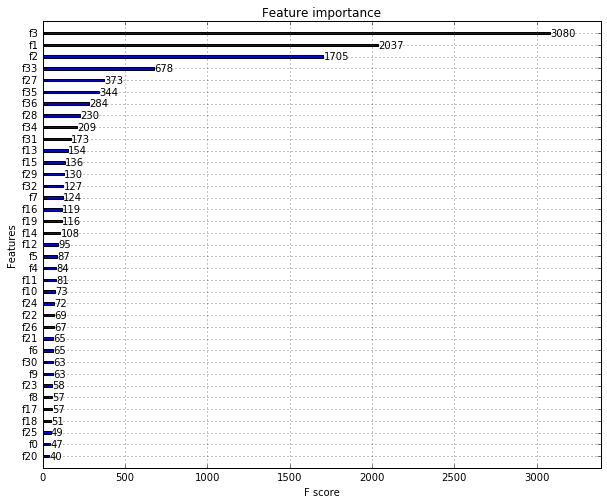

In [146]:
#train_X.iloc[train_index]
xgb.plot_importance(model1)

In [147]:
model1.get_fscore()

from collections import defaultdict

variable_importance = defaultdict(int)
for key, v in model1.get_fscore().items():
    if(key[1:] == '0'):
        variable_importance['Apartment'] += v
    if(key[1:] == '1'):
        variable_importance['Review'] += v
    if(key[1:] == '2'):
        variable_importance['Pic Quality'] += v
    if(key[1:] == '3'):
        variable_importance['Price'] += v
    if(int(key[1:]) >=4 and int(key[1:]) <= 13): 
        variable_importance['Region'] += v

    if(int(key[1:]) >=14 and int(key[1:]) <= 25): 
        variable_importance['Month'] += v
    if(int(key[1:]) >=26 and int(key[1:]) <= 32):
        variable_importance['Weekday'] += v
    if(int(key[1:]) >=33 and int(key[1:]) <= 36):
        variable_importance['beds'] += v
        

variable_importance

defaultdict(int,
            {'Apartment': 47,
             'Month': 940,
             'Pic Quality': 1705,
             'Price': 3080,
             'Region': 883,
             'Review': 2037,
             'Weekday': 1163,
             'beds': 1515})

In [141]:
train_X.describe()

Review   Pic Quality         Price      Region_1      Region_2  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       4.509402      0.750261    316.963436      0.098660      0.098700   
std        0.460287      0.193746     92.644791      0.298208      0.298262   
min        3.000000      0.036809     80.000000      0.000000      0.000000   
25%        4.306552      0.630497    251.637842      0.000000      0.000000   
50%        4.652005      0.794165    315.334386      0.000000      0.000000   
75%        4.855238      0.908876    378.920370      0.000000      0.000000   
max        4.999996      0.999985    726.527643      1.000000      1.000000   

           Region_3      Region_4      Region_5      Region_6      Region_7  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.103020      0.100720      0.099040      0.101960      0.099540   
std        0.303988      0.300961      0.298719      0.302599      0.299389   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           ...          Weekday_2     Weekday_3     Weekday_4     Weekday_5  \
count      ...       50000.000000  50000.000000  50000.000000  50000.000000   
mean       ...           0.142840      0.141560      0.142760      0.142120   
std        ...           0.349913      0.348602      0.349831      0.349177   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      0.000000      0.000000   
max        ...           1.000000      1.000000      1.000000      1.000000   

          Weekday_6     Weekday_7        Beds_1        Beds_2        Beds_3  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.139600      0.145340      0.606300      0.304840      0.075660   
std        0.346575      0.352447      0.488575      0.460344      0.264456   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      1.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             Beds_4  
count  50000.000000  
mean       0.013200  
std        0.114132  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 36 columns]

## lightgbm


In [174]:
import lightgbm as lgb

best_score= 0
for rep in range(1):
    ran_num =  1209
    split_seed= np.random.RandomState(ran_num)
    print('The seed we are using is: %d' % ran_num)
    nr_runs = 5
    kf = KFold(n_splits=nr_runs, random_state=split_seed)
    tree_lim =0
    for r, (train_index, test_index) in enumerate(kf.split(train_X, train_y)):
        print('\nround {:04d} of {:04d}, seed={}'.format(r+1, nr_runs, split_seed))

        tmp = dt.datetime.now().strftime("%Y-%m-%d-%H-%M")

        x1, x2 = train_X.iloc[train_index].values, train_X.iloc[test_index].values
        y1, y2 = train_y.iloc[train_index].values, train_y.iloc[test_index].values
        #x1, x2, y1, y2 = train_test_split(train_X, train_y, test_size=test_ratio, random_state=split_seed + r)
        print('splitted: {0}, {1}'.format(x1.shape, x2.shape), flush=True)


        lgb_train = lgb.Dataset(x1, label=y1, free_raw_data=False)
        lgb_valid = lgb.Dataset(x2, label=y2, reference=lgb_train, free_raw_data=False)
        #gbdt
        params = {'learning_rate': 0.02, 'max_depth': 4, 'boosting': 'gbdt', 'objective': 'binary', 'is_training_metric': False, 'seed': 99}
        params['boosting'] = 'gbdt'
        params['metric'] = 'auc'
        params['learning_rate'] = 0.02
        params['max_depth'] = 3
        params['num_leaves'] = 5 # higher number of leaves
        params['feature_fraction'] = 0.9 # Controls overfit
        params['bagging_fraction'] = 0.9    
        params['bagging_freq'] = 5
        params['seed'] = ran_num + r
        params['lambda_l2'] = 1.5
        #
        params['verbose'] = -1
        nr_round = 3000
        
        model2 = lgb.train(params, 
                       lgb_train, 
                       nr_round, 
                       lgb_valid, 
                       verbose_eval=100, early_stopping_rounds=min_round)
        
        best_score += model2.best_score['valid_0']['auc']
        
        
print('The best score we got is: {}.'.format(best_score/5), flush=True)              

The seed we are using is: 1209

round 0001 of 0005, seed=<mtrand.RandomState object at 0x1178a0870>
splitted: (40000, 36), (10000, 36)
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.737311
[200]	valid_0's auc: 0.754167
[300]	valid_0's auc: 0.765289
[400]	valid_0's auc: 0.772032
[500]	valid_0's auc: 0.775928
[600]	valid_0's auc: 0.778451
[700]	valid_0's auc: 0.780271
[800]	valid_0's auc: 0.781689
[900]	valid_0's auc: 0.782721
[1000]	valid_0's auc: 0.783689
[1100]	valid_0's auc: 0.78436
[1200]	valid_0's auc: 0.784722
[1300]	valid_0's auc: 0.78517
[1400]	valid_0's auc: 0.785401
[1500]	valid_0's auc: 0.785568
[1600]	valid_0's auc: 0.785664
[1700]	valid_0's auc: 0.78582
[1800]	valid_0's auc: 0.785718
Early stopping, best iteration is:
[1700]	valid_0's auc: 0.78582

round 0002 of 0005, seed=<mtrand.RandomState object at 0x1178a0870>
splitted: (40000, 36), (10000, 36)
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's auc: 0.7

In [122]:
model2.best_score['valid_0']['auc']


0.78540877165002709

In [39]:
import torch
import torch.nn as nn
from torch.nn import init
from torch.autograd import Variable
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler, RandomSampler
import torchvision.models as models
from torch.optim.lr_scheduler import MultiStepLR, ReduceLROnPlateau
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import StepLR



class NN(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes,dropout,batchnorm):
        super().__init__()
        self.num_layers = len(hidden_size)+1
        layer_size = [input_size] + hidden_size+ [num_classes]
        self.nn =nn.Sequential()
        for layer in range(self.num_layers):
            idx = layer+1
            self.nn.add_module('fc'+str(idx),nn.Linear(layer_size[layer], layer_size[layer+1]))
            if layer != self.num_layers-1:
                if batchnorm is not None:
                        self.nn.add_module('batchnorm'+str(idx),
                                           nn.BatchNorm1d(num_features=layer_size[layer+1],eps=1e-8))
                self.nn.add_module('relu'+str(idx),nn.ReLU())
                if dropout is not None:
                    self.nn.add_module('dropout'+str(idx),nn.Dropout(p=dropout))
                else:
                    pass

        for name, module in self.nn.named_children():
            if 'fc' in name:
                init.xavier_normal(module.weight)
                init.constant(module.bias,0.1)
                
        
    def forward(self, x):  
        out = self.nn.forward(x)
        return out

In [66]:
class housing_dataset(Dataset):
    def __init__(self, data, label): #data: 1604 * 3 *75* 75
        self.data =torch.from_numpy(data).float()#.type(torch.LongTensor)
        self.label = torch.from_numpy(label).float().type(torch.LongTensor)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        img, label=  self.data[idx], self.label[idx]
        return img, label

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

train_index=list(range(0,40000)) 
val_index= list(range(40000, 50000))


std_train_X = train_X.iloc[train_index].copy()
std_val_X = train_X.iloc[val_index].copy()

col_names =  ['Review', 'Pic Quality', 'Price']

features= std_train_X[col_names]
scalar = StandardScaler().fit(features.values)
features = scalar.transform(features.values)
std_train_X[col_names] = features

std_val_X[col_names] = scalar.transform(std_val_X[col_names].values)

train_dataset = housing_dataset(data= std_train_X.values, label=train_y[train_index].values)
val_dataset =  housing_dataset(data= std_val_X.values, label=train_y[val_index].values)

train_loader = DataLoader(train_dataset, batch_size = 64, num_workers=3, 
                          shuffle=True)
val_loader = DataLoader(val_dataset, batch_size = 64, num_workers=3)


use_cuda= True if torch.cuda.is_available() else False

In [85]:
def train(epoch,early_stopping = None):
    global train_data#,out,y,predicted
    acc=0
    val_loss=0
    best_acc = 0
    best_val_loss= 100
    loss_hist = []
    val_loss_hist = []
    train_acc_hist = []
    val_acc_hist = []
    train_data={}
    train_data['loss_hist'] = loss_hist
    train_data['val_loss_hist'] = val_loss_hist
    train_data['train_acc_hist'] = train_acc_hist
    train_data['val_acc_hist'] =  val_acc_hist
    e_s= 0
    best_epoch =0
    
    for i in range(epoch):
        print('\nThis is epoch:{}'.format(i+1))
        total= 0
        correct=0
        loss_avg= 0
        scheduler.step()
        #scheduler.step(acc)
        net.train()
        for j,(batch_x, batch_y) in enumerate(train_loader):
            optimizer.zero_grad()
            if use_cuda:
                batch_x, batch_y = batch_x.cuda(), batch_y.cuda()
            x = Variable(batch_x)
            y = Variable(batch_y)
            out = net(x)
            loss = criterion(out, y)
            loss_avg += loss.cpu().data[0] *out.size()[0]
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(out.data, 1)
            total += y.size(0)
            correct += predicted.eq(y.data).cpu().sum()
            progress_bar(j, len(train_loader), 'Loss: %.2f | Acc: %.2f%% (%d/%d)'
                % (loss_avg/total, 100.*correct/total, correct, total))
            if j % 5==0:
                loss_hist.append(loss_avg/total)
            
        train_acc_hist.append(100.*correct/total)
        e_s+=1
        if i %1 == 0:
            acc, val_loss = test(val_loader)

            val_acc_hist.append(acc) 
#            if loss_avg/total >val_loss:
#               e_s=0

#            if early_stopping is not None and e_s >= early_stopping:
#                return best_val_loss,best_acc,best_epoch

    return best_val_loss,best_acc,best_epoch
#         if i%50==0 and save:
#             torch.save(net.state_dict(), 'resnet50.pth')
        
def test(val_load):
    net.eval()
    total = 0
    correct = 0
    loss_avg= 0
    
    predict_prob= np.array([])
    
    for k, (val_x, val_y) in enumerate(val_load):
        if use_cuda:
            val_x, val_y = val_x.cuda(), val_y.cuda()
        x = Variable(val_x)
        y = Variable(val_y)
        out = net(x)
        loss = criterion(out, y)
        loss_avg += loss.cpu().data[0] *out.size()[0]
        #print(out.size())
        _, predicted = torch.max(out.data, 1)
        correct += predicted.eq(y.data).cpu().sum()
        total += out.size()[0]
        progress_bar(k, len(val_load), 'Loss: %.3f | Acc: %.3f%% (%d/%d)'
                % (loss_avg/total, 100.*correct/total, correct, total))
        
        
        #Compute AUC
        
        output= np.exp(out.cpu().data.numpy()) 
        prob =  output[:,1]/(output[:,0]+ output[:,1])
        predict_prob = np.concatenate([predict_prob, prob])
    
    
    auc = roc_auc_score(train_y[val_index].values, predict_prob)
    
    
    print("The AUC for this round is: {}".format(auc))
    train_data['val_loss_hist'].append(loss_avg/total) #also keep track of loss of val set
    acc =  (correct*100.0)/total
    return acc,loss_avg/total

In [86]:
net= NN(input_size =36, hidden_size =[1000, 512, 512], num_classes=2, dropout =0.2, batchnorm=True)
criterion = nn.CrossEntropyLoss()

#Adam does not perform so good here   
#(0.1, 0.0001) (50, 80, 110, 170) 52 epoch reaches the maximum.
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0002, nesterov= True)
scheduler = MultiStepLR(optimizer, [5, 10], gamma=0.1)
#scheduler = ReduceLROnPlateau(optimizer, 'max', patience =10,min_lr= 0.0001)
#5e-3 86
if use_cuda:
    criterion.cuda()
    net.cuda()
#     resnet101 = torch.nn.DataParallel(resnet101, device_ids=range(torch.cuda.device_count()))
#     cudnn.benchmark = True   

temp = train(epoch=20,early_stopping=5)


This is epoch:1
[========= 625/625 ======>]Step: 0ms| Tot: 13s5ms|Loss: 0.50 | Acc: 72.64% (29058/40000)
[========= 157/157 ======>]Step: 0ms| Tot: 1s|Loss: 0.467 | Acc: 73.380% (7338/10000)
The AUC for this round is: 0.7814611271482309

This is epoch:2
[========= 625/625 ======>]Step: 0ms| Tot: 13s7ms|Loss: 0.47 | Acc: 73.25% (29300/40000)

This is epoch:3
[========= 625/625 ======>]Step: 0ms| Tot: 13s9ms|Loss: 0.47 | Acc: 73.46% (29385/40000)

This is epoch:4
[========= 625/625 ======>]Step: 0ms| Tot: 14s|Loss: 0.47 | Acc: 73.78% (29514/40000)

This is epoch:5
[========= 625/625 ======>]Step: 0ms| Tot: 14s3ms|Loss: 0.46 | Acc: 73.82% (29528/40000)
[========= 157/157 ======>]Step: 0ms| Tot: 1s|Loss: 0.462 | Acc: 74.010% (7401/10000)
The AUC for this round is: 0.7855872917474805

This is epoch:6
[========= 625/625 ======>]Step: 0ms| Tot: 14s3ms|Loss: 0.46 | Acc: 74.65% (29860/40000)

This is epoch:7
[========= 625/625 ======>]Step: 0ms| Tot: 14s6ms|Loss: 0.46 | Acc: 74.55% (29821/4000

Process Process-110:
Process Process-109:
Process Process-111:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/multiprocessing/process.py", line 254, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/multiprocessin

KeyboardInterrupt: 

In [51]:
#std_train_X.values




array([[ 0.04125465, -0.05385911, -0.93037896, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08787853,  0.57926098,  0.33838181, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99359928, -1.2124721 ,  1.22547478, ...,  1.        ,
         0.        ,  0.        ],
       ..., 
       [-1.52557077, -2.0377711 , -1.39302459, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38700047,  0.44144231, -0.21879933, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.90074841,  1.14238863, -0.25538049, ...,  1.        ,
         0.        ,  0.        ]])